In [38]:
import pandas as pd  # Used for data processing and analysis
import numpy as np   # Used for numerical operations
from sklearn import metrics  # Used to measure performance of the model. These metrics include MSE, MAE and R^2
from sklearn.model_selection import train_test_split  # Used to split the data into training and testing datasets
import matplotlib.pyplot as plt  # Used for data visualization and plotting
from sklearn.ensemble import RandomForestRegressor  # This is the ML model we will use
from sklearn.preprocessing import StandardScaler  # This is used for data normalization
import seaborn as sns# Used to plot correlation analysis results



# LOADING THE DATA

In [39]:
df = pd.read_csv("Apple_stock_price.csv")
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
12/12/1980,0.1000,0.1004,0.1000,0.1000,469033600
12/15/1980,0.0952,0.0952,0.0948,0.0948,175884800
12/16/1980,0.0882,0.0882,0.0878,0.0878,105728000
12/17/1980,0.0900,0.0904,0.0900,0.0900,86441600
12/18/1980,0.0926,0.0930,0.0926,0.0926,73449600


In [40]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
12/12/1980,0.1000,0.1004,0.1000,0.1000,469033600
12/15/1980,0.0952,0.0952,0.0948,0.0948,175884800
12/16/1980,0.0882,0.0882,0.0878,0.0878,105728000
12/17/1980,0.0900,0.0904,0.0900,0.0900,86441600
12/18/1980,0.0926,0.0930,0.0926,0.0926,73449600


In [41]:
df.shape

(10663, 5)

# Missing values

In [42]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data pre-processing

In [43]:
df_test=df.head
df=df

In [44]:
X_train=df[['Open','High','Low','Close']][:30]
y_train=df['Open'][:30]
X_test=df[['Open','High','Low','Close']][:30]
y_test=df['Open'][:30]

# Correlation Matrix

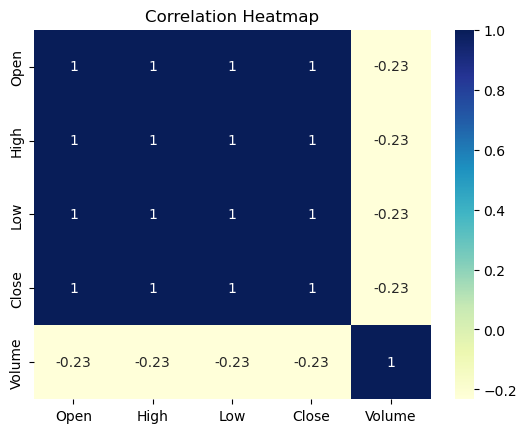

In [45]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [46]:
df = df.drop(columns=["Volume"])

# Moving Average

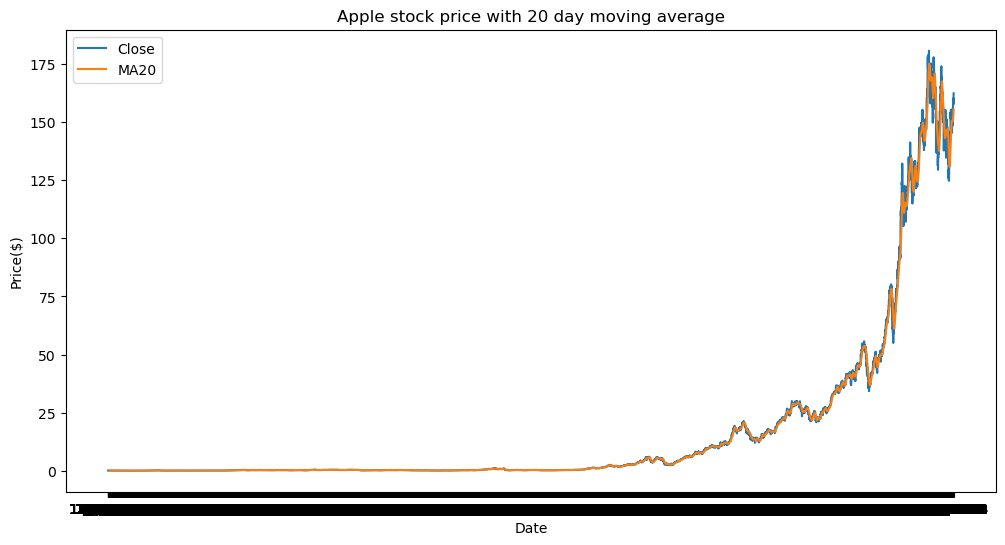

In [48]:
df['MA20']=df['Close'].rolling(window=20).mean()

#plotting close price and moving average
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Close')
plt.plot(df.index,df['MA20'],label='MA20')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.title('Apple stock price with 20 day moving average')
plt.legend()
plt.show()

# FEATURE SELECTION

In [52]:
feature_names = ['Open', 'High', 'Low']
x = df[feature_names]#These are our training set
y = df['Close']#These are our testing set

In [53]:
print("The shape of X is: ",x.shape)
print("The shape of y is: ",y.shape)

The shape of X is:  (10663, 3)
The shape of y is:  (10663,)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=100)

# SCALING THE FEATURES

In [55]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [56]:
model = RandomForestRegressor(n_estimators=25, random_state=100, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[7.88861104e-02 2.06874254e+00 3.17277126e-01 ... 1.31998227e-01
 4.45275965e-01 1.48497157e+02]
(2133,)


This code uses the random forest regression algorithm from scikit-learn to fit a model to training data and make predictions on test data

# Evaluating the Model

In [57]:
from sklearn import metrics

#Calculate mean absolute error between predicted and actual values
mae = round(metrics.mean_absolute_error(y_test, predict), 4)

#Calculate mean squared error between predicted and actual values
mse = round(metrics.mean_squared_error(y_test, predict), 4)

#Calculate root mean squared error between predicted and actual values
rmse = round(np.sqrt(mse), 4)

#Calculate R^2 score between predicted and actual values
r2 = round(metrics.r2_score(y_test, predict), 4)

#Calculate the model score on training data and multiply by 100 to convert to percentage
train_score = model.score(x_train, y_train) * 100

#Calculate the model score on testing data and multiply by 100 to convert to percentage
test_score = model.score(x_test, y_test) * 100

#Calculate the accuracy of the model on testing data
accuracy = round(100 - np.mean(100 * (abs(predict - y_test) / y_test)), 2)

#Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("(R^2) Score:", r2)
print(f'Train Score: {train_score:.2f} ')
print(f'Test Score: {test_score:.2f}')
print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 0.1212
Mean Squared Error: 0.1665
Root Mean Squared Error: 0.408
(R^2) Score: 0.9999
Train Score: 100.00 
Test Score: 99.99
Accuracy: 98.59 %.


In [58]:
# PREDICTING THE NEXT 30 DAYS
next_30_days = df.iloc[-30:][['Open', 'High', 'Low']]
next_30_days_scaled = scale.transform(next_30_days)
predictions_next_30_days = model.predict(next_30_days_scaled)
predictions_next_30_days.shape

print("The predictions for the next 30days are;", predictions_next_30_days )

predictions_next_30_days.shape


The predictions for the next 30days are; [154.84290118 152.13429366 149.43608803 148.49715654 148.6832645
 146.82044628 147.94186421 147.90928308 145.70458046 145.639373
 150.12705826 155.13577084 151.76759547 152.68625903 151.42913421
 148.6380887  150.47922551 152.01919637 152.02376108 155.55141378
 155.5065399  156.772622   159.10204155 160.06838057 159.15955371
 159.90772713 159.33397413 157.56478587 160.7248834  162.41452253]


(30,)

<AxesSubplot:title={'center':'Actual vs Predicted - Feb 16 - Mar 24'}, xlabel='Date'>

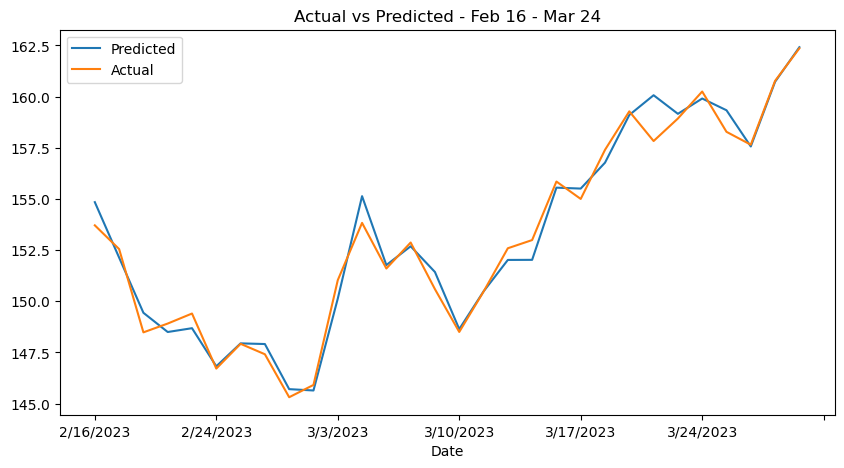

In [59]:
# PLOTTING THE NEXT 30 DAYS
df_next_30_days = pd.DataFrame(predictions_next_30_days, columns=['Predicted'], index=df.iloc[-30:].index)
df_next_30_days['Actual'] = df['Close'].iloc[-30:]
df_next_30_days.plot(kind='line', figsize=(10, 5), title='Actual vs Predicted - Feb 16 - Mar 24')


In [62]:
# DETERMINE DIRECTION FOR NEXT 30 DAYS
actual_next_30_days = df['Close'].iloc[-30:]
direction_next_30_days = np.sign(np.diff(actual_next_30_days))
predicted_direction_next_30_days = np.sign(np.diff(predictions_next_30_days))

# CALCULATE DIRECTIONAL ACCURACY FOR NEXT 30 DAYS
directional_accuracy_next_30_days = np.mean(direction_next_30_days == predicted_direction_next_30_days)
print(f"Directional accuracy for the 30 days:{directional_accuracy_next_30_days*100:.2f}%")


Directional accuracy for the 30 days:86.21%
